In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv('Fifa_stats.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,Player,Age,League,Club,Position,Value,Overall,Shooting,Passing,Dribbling,Defending,Physical
0,Bruno Fernandes,27,Premier League,Manchester United,midfield,74900000.0,93.14,86.99,93.91,96.90,60.92,94.78
1,Randal Kolo Muani,23,Bundesliga,Eintracht Frankfurt,Attack,64000000.0,79.55,81.78,69.47,85.58,38.54,81.39
2,Victor Osimhen,23,Serie A,SSC Napoli,Attack,55000000.0,76.58,84.69,63.15,77.83,38.28,80.64
3,Bukayo Saka,20,Premier League,Arsenal FC,Attack,55000000.0,93.19,93.15,84.07,97.95,57.02,97.58
4,Vinicius Junior,22,La Liga,Real Madrid,Attack,50000000.0,84.88,81.44,80.43,91.92,46.79,85.72


In [3]:
new_row = ['Prime Messi', 24, 'La Liga', 'FC Barcelona', 'Attack', 999999999, 99, 99, 99, 99, 50, 80]
new_row_df = pd.DataFrame([new_row], columns=df.columns)
df = df.append(new_row_df, ignore_index= True)
new_row = ['Prime Ronaldo', 27, 'La Liga', 'Real Madrid', 'Attack', 999999999, 99, 99, 99, 99, 69, 99]
new_row_df = pd.DataFrame([new_row], columns=df.columns)
df = df.append(new_row_df, ignore_index= True)
new_row = ['Fifa Gullit', 90, 'Fifa', 'Ultimate Teams FC', 'Midfield', 999999999, 90, 90, 90, 90, 90, 90]
new_row_df = pd.DataFrame([new_row], columns=df.columns)
df = df.append(new_row_df, ignore_index= True)
df

/var/folders/gp/fz598jcd1wn_0cr1f0frwnbm0000gn/T/ipykernel_87801/3925878417.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row_df, ignore_index= True)
/var/folders/gp/fz598jcd1wn_0cr1f0frwnbm0000gn/T/ipykernel_87801/3925878417.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row_df, ignore_index= True)
/var/folders/gp/fz598jcd1wn_0cr1f0frwnbm0000gn/T/ipykernel_87801/3925878417.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row_df, ignore_index= True)


,Player,Age,League,Club,Position,Value,Overall,Shooting,Passing,Dribbling,Defending,Physical
0,Bruno Fernandes,27,Premier League,Manchester United,midfield,74900000.0,93.14,86.99,93.91,96.90,60.92,94.78
1,Randal Kolo Muani,23,Bundesliga,Eintracht Frankfurt,Attack,64000000.0,79.55,81.78,69.47,85.58,38.54,81.39
2,Victor Osimhen,23,Serie A,SSC Napoli,Attack,55000000.0,76.58,84.69,63.15,77.83,38.28,80.64
3,Bukayo Saka,20,Premier League,Arsenal FC,Attack,55000000.0,93.19,93.15,84.07,97.95,57.02,97.58
4,Vinicius Junior,22,La Liga,Real Madrid,Attack,50000000.0,84.88,81.44,80.43,91.92,46.79,85.72
...,...,...,...,...,...,...,...,...,...,...,...,...
1603,Jadon Sancho,22,Premier League,Manchester United,Attack,-30000000.0,68.42,72.37,66.35,70.35,35.67,64.60
1604,Sadio Mane,30,Bundesliga,Bayern Munich,Attack,-45000000.0,62.66,61.97,60.27,66.28,30.29,62.11
1605,Prime Messi,24,La Liga,FC Barcelona,Attack,999999999.0,99.00,99.00,99.00,99.00,50.00,80.00
1606,Prime Ronaldo,27,La Liga,Real Madrid,Attack,999999999.0,99.00,99.00,99.00,99.00,69.00,99.00


In [4]:
df_name = df['Player']
df_age = df['Age']
df_club = df['Club']
df_position = df['Position']
df_value = df['Value']
df_name.head()

0      Bruno Fernandes
1    Randal Kolo Muani
2       Victor Osimhen
3          Bukayo Saka
4      Vinicius Junior
Name: Player, dtype: object

In [5]:
df_stat = df[['Shooting', 'Passing', 'Dribbling', 'Defending', 'Physical']]

# Euclidean Model

In [6]:
k_neighbors = 10
knn_model = NearestNeighbors(n_neighbors=k_neighbors, metric='euclidean')
knn_model.fit(df_stat)

NearestNeighbors(metric='euclidean', n_neighbors=10)

In [13]:
player = 'Erling Haaland'
input_player_stats = df[df['Player'] == player][['Shooting', 'Passing', 'Dribbling', 'Defending', 'Physical']]

distances, indices = knn_model.kneighbors(input_player_stats)

# Calculate similarity scores for each player
similarity_scores = 1 / (1 + distances*0.01)

# Create a DataFrame to display the results
similar_players_df = pd.DataFrame({
    'Player': df_name[indices[0]],
    'Similarity Score%': (similarity_scores[0]*100).round(2),
    'Position': df_position[indices[0]],
    'Age': df_age[indices[0]],
    'Club': df_club[indices[0]],
    'Value': df_value[indices[0]]
})

# Sort the DataFrame based on similarity scores in descending order
similar_players_df = similar_players_df.sort_values(by='Similarity Score%', ascending=False)
similar_players_df

,Player,Similarity Score%,Position,Age,Club,Value
19,Erling Haaland,100.00,Attack,22,Manchester City,30000000.0
1385,Alvaro Morata,93.32,Attack,29,Atlético de Madrid,-5000000.0
261,Habib Diallo,92.10,Attack,27,RC Strasbourg Alsace,6000000.0
1002,Ibrahima Kone,91.85,Attack,23,FC Lorient,-500000.0
1561,Robert Lewandowski,91.79,Attack,33,FC Barcelona,-15000000.0
253,Josh Dasilva,91.72,midfield,23,Brentford FC,6000000.0
27,Folarin Balogun,91.43,Attack,21,Arsenal FC,26000000.0
99,Boulaye Dia,91.34,Attack,25,US Salernitana 1919,13000000.0
1105,Alexandre Lacazette,91.32,Attack,31,Olympique Lyon,-1000000.0
482,Philip Billing,91.30,midfield,26,AFC Bournemouth,2000000.0


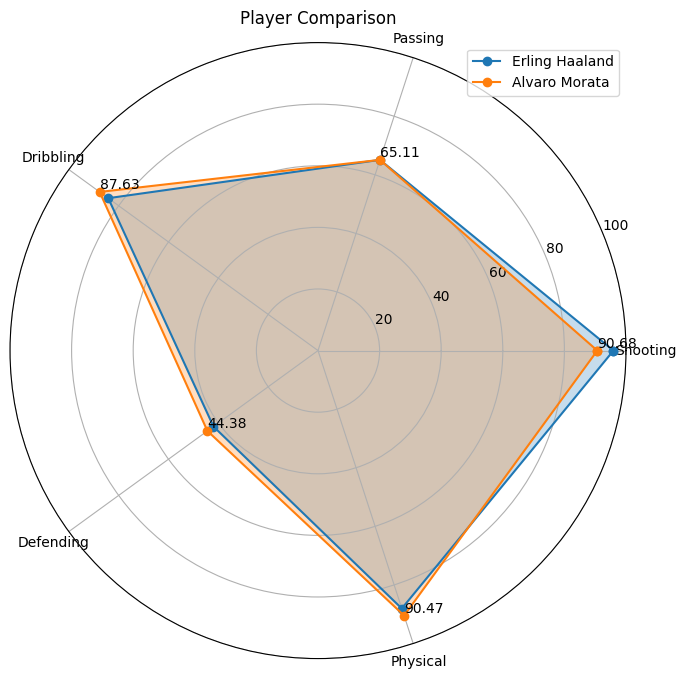

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
variables = ['Shooting', 'Passing', 'Dribbling', 'Defending', 'Physical']
values = df[df['Player'] == player][['Shooting', 'Passing', 'Dribbling', 'Defending', 'Physical']]
values = values.iloc[0].tolist()

top_x = 1
player2 = similar_players_df['Player'].iloc[top_x]
values2 = df[df['Player'] == player2][['Shooting', 'Passing', 'Dribbling', 'Defending', 'Physical']]
values2 = values2.iloc[0].tolist()

# Number of variables
num_vars = len(variables)

# Calculate the angle at which each variable will be placed on the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False)

# Close the radar chart by repeating the first data point
values = np.concatenate((values, [values[0]]))
values2 = np.concatenate((values2, [values2[0]]))
angles = np.concatenate((angles, [angles[0]]))

# Set the figure size
plt.figure(figsize=(8, 8))

# Plot the radar chart
plt.polar(angles, values, marker='o', label = player)
plt.fill(angles, values, alpha=0.25)
plt.polar(angles, values2, marker='o', label = player2)
plt.fill(angles, values2, alpha=0.25)

# Set the angle ticks and labels
plt.xticks(angles[:-1], variables)

# Set the plot title
plt.title('Player Comparison')

plt.ylim(0, 100)

#for i in range(num_vars):
#    plt.text(angles[i], values[i], str(values[i]), ha='right', va='top')

for i in range(num_vars):
    plt.text(angles[i], values2[i], str(values2[i]), ha='left', va='bottom')

plt.legend(loc='upper right')


# Show the plot
plt.show()


# Cosine Similarity Model, to find upcoming young players

In [16]:
k_neighbors = 10
cos_model = NearestNeighbors(n_neighbors=k_neighbors, algorithm='brute', metric='cosine')
cos_model.fit(df_stat)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=10)

In [36]:
player = 'Robert Lewandowski'
input_player_stats = df[df['Player'] == player][['Shooting', 'Passing', 'Dribbling', 'Defending', 'Physical']]

distances, indices = cos_model.kneighbors(input_player_stats, n_neighbors=6)

# Get the similar players' data
similar_players = df.loc[indices[0]]

# Create a new DataFrame to store the results
result_df = similar_players.copy()
result_df['Similarity Score'] = 1 - distances[0]

# Reset the index of the result DataFrame for a cleaner index
result_df.reset_index(drop=True, inplace=True)

result_df = result_df[['Player', 'Similarity Score', 'Position', 'Age', 'Club', 'Value']]
result_df.sort_values(by = 'Age', ascending=True, inplace = True)
result_df

,Player,Similarity Score,Position,Age,Club,Value
1,Dusan Vlahovic,0.999975,Attack,22,Juventus FC,-15000000.0
4,Jonathan David,0.999929,Attack,22,LOSC Lille,15000000.0
2,Josh Dasilva,0.999950,midfield,23,Brentford FC,6000000.0
3,Emil Forsberg,0.999936,midfield,30,RB Leipzig,-4000000.0
5,Paul Gladon,0.999925,Attack,30,Fortuna Sittard,4550000.0
0,Robert Lewandowski,1.000000,Attack,33,FC Barcelona,-15000000.0


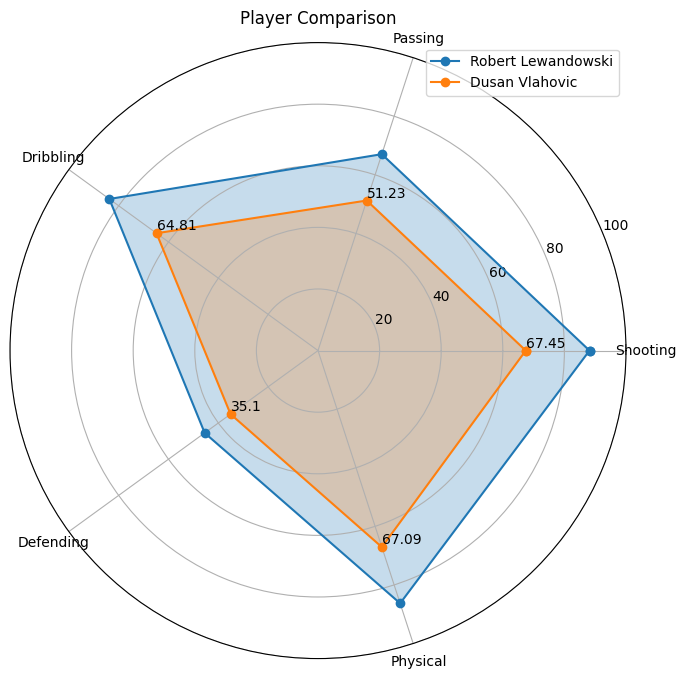

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
variables = ['Shooting', 'Passing', 'Dribbling', 'Defending', 'Physical']
values = df[df['Player'] == player][['Shooting', 'Passing', 'Dribbling', 'Defending', 'Physical']]
values = values.iloc[0].tolist()

top_x = 0
player2 = result_df['Player'].iloc[top_x]
values2 = df[df['Player'] == player2][['Shooting', 'Passing', 'Dribbling', 'Defending', 'Physical']]
values2 = values2.iloc[0].tolist()

# Number of variables
num_vars = len(variables)

# Calculate the angle at which each variable will be placed on the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False)

# Close the radar chart by repeating the first data point
values = np.concatenate((values, [values[0]]))
values2 = np.concatenate((values2, [values2[0]]))
angles = np.concatenate((angles, [angles[0]]))

# Set the figure size
plt.figure(figsize=(8, 8))

# Plot the radar chart
plt.polar(angles, values, marker='o', label = player)
plt.fill(angles, values, alpha=0.25)
plt.polar(angles, values2, marker='o', label = player2)
plt.fill(angles, values2, alpha=0.25)

# Set the angle ticks and labels
plt.xticks(angles[:-1], variables)

# Set the plot title
plt.title('Player Comparison')

plt.ylim(0, 100)

#for i in range(num_vars):
#    plt.text(angles[i], values[i], str(values[i]), ha='right', va='top')

for i in range(num_vars):
    plt.text(angles[i], values2[i], str(values2[i]), ha='left', va='bottom')

plt.legend(loc='upper right')


# Show the plot
plt.show()


## Predicting the next Ronaldo

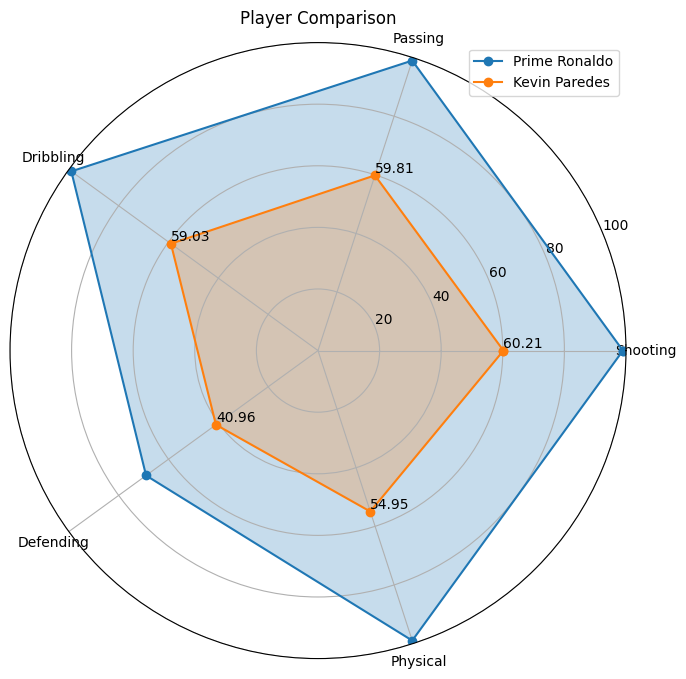

In [33]:
player = 'Prime Ronaldo'
input_player_stats = df[df['Player'] == player][['Shooting', 'Passing', 'Dribbling', 'Defending', 'Physical']]

distances, indices = cos_model.kneighbors(input_player_stats, n_neighbors=6)

# Get the similar players' data
similar_players = df.loc[indices[0]]

# Create a new DataFrame to store the results
result_df = similar_players.copy()
result_df['Similarity Score'] = 1 - distances[0]

# Reset the index of the result DataFrame for a cleaner index
result_df.reset_index(drop=True, inplace=True)

result_df = result_df[['Player', 'Similarity Score', 'Position', 'Age', 'Club', 'Value']]
result_df.sort_values(by = 'Age', ascending=True, inplace = True)

import numpy as np
import matplotlib.pyplot as plt

# Sample data
variables = ['Shooting', 'Passing', 'Dribbling', 'Defending', 'Physical']
values = df[df['Player'] == player][['Shooting', 'Passing', 'Dribbling', 'Defending', 'Physical']]
values = values.iloc[0].tolist()

top_x = 0
player2 = result_df['Player'].iloc[top_x]
values2 = df[df['Player'] == player2][['Shooting', 'Passing', 'Dribbling', 'Defending', 'Physical']]
values2 = values2.iloc[0].tolist()

# Number of variables
num_vars = len(variables)

# Calculate the angle at which each variable will be placed on the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False)

# Close the radar chart by repeating the first data point
values = np.concatenate((values, [values[0]]))
values2 = np.concatenate((values2, [values2[0]]))
angles = np.concatenate((angles, [angles[0]]))

# Set the figure size
plt.figure(figsize=(8, 8))

# Plot the radar chart
plt.polar(angles, values, marker='o', label = player)
plt.fill(angles, values, alpha=0.25)
plt.polar(angles, values2, marker='o', label = player2)
plt.fill(angles, values2, alpha=0.25)

# Set the angle ticks and labels
plt.xticks(angles[:-1], variables)

# Set the plot title
plt.title('Player Comparison')

plt.ylim(0, 100)

#for i in range(num_vars):
#    plt.text(angles[i], values[i], str(values[i]), ha='right', va='top')

for i in range(num_vars):
    plt.text(angles[i], values2[i], str(values2[i]), ha='left', va='bottom')

plt.legend(loc='upper right')


# Show the plot
plt.show()
